# Simulazione di Rate di Muoni cosmici

In questa simulazione ci occuperemo di studiare il rate R di un flusso di muoni cosmici che impatta su un sistema di due fotorivelatori:

Supponiamo che ai nostri rivelatori giunga soltanto la parte dura del flusso di raggi cosmici secondari, ovvero i muoni. Questa condizione può essere verificata inserendo un materiale assorbitore prima del primo rivelatore.
I raggi cosmici hanno una distribuzione angolare rispetto alla normale alla superficie della Terra descrivibile
dalla funzione:
$ f(theta) \propto  cos^2(\theta) $

## Librerie da importare

In [52]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
import math
import numpy.random as rnd

## Generazione iniziale

Generiamo 100000 Muoni che impattano sulla superficie del primo rivelatore con un angolo theta distribuito come sopra, e x, y  e phi (angolo  sul piano del rivelatore) distribuiti in modo uniforme.

In [53]:
Nmuon= 100000
X = 10 #Cm
Y = 20 #Cm
#scriviamo la funzione di distribuzione
def F(t):
     return np.cos(t)*np.cos(t)

#cord() genera le coordinate casuali di un evento

def cord():
    x= rnd.uniform(0, X)
    y= rnd.uniform(0, Y)
    phi= rnd.uniform(0, 2*np.pi)
      #qui generiamo theta
    ##per generare theta procediamo nel seguente modo (hit or miss), generiamo theta ed f di theta in modo uniforme 
    ##nel loro intervallo di definizione,se ftheta è minore di Ftheta ovvero valore ottenuto da formula con theta 
    ##generato casualmente allora prendiamo theta altrimenti rifacciamo tutto
    theta= rnd.uniform(-np.pi *0.5, np.pi*0.5)
    ftheta= rnd.uniform(0,1)
    while ftheta > F(theta):
        theta= rnd.uniform(-np.pi*0.5, np.pi*0.5)
        ftheta= rnd.uniform(0, 4/np.pi)
    cord = np.array( [x,y, phi, theta] )
    return cord 



#generiamo gli Nmuon incidenti

inc1=np.array([cord() for i in range(Nmuon) ]) 
print(inc1)

[[ 1.94090889e+00  1.81823111e+00  6.19309993e+00  1.85411520e-01]
 [ 7.20473533e-01  6.44853556e+00  5.00451385e+00 -5.99542471e-02]
 [ 5.08713664e+00  1.85702569e+01  3.59195220e+00 -3.58578354e-01]
 ...
 [ 1.53495882e-01  5.60251041e+00  1.66286944e+00  8.16459520e-01]
 [ 6.53037923e+00  1.71398416e+01  4.49945844e+00 -7.47658717e-02]
 [ 5.13362586e+00  2.55900187e+00  5.47158888e+00  3.06177293e-03]]


Verifichiamo che le particella siano distribuite correttamente:

<IPython.core.display.Javascript object>


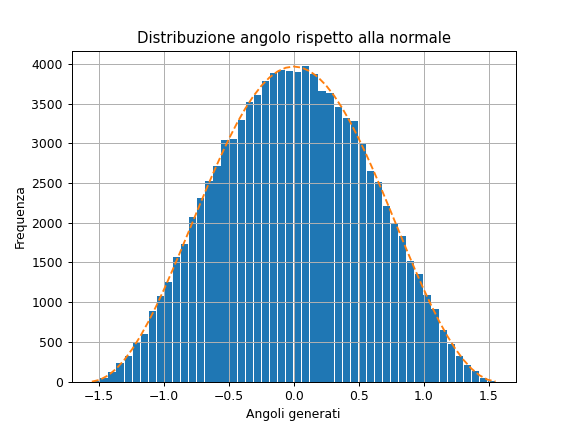

Text(0.5, 1.0, 'Distribuzione angolo rispetto alla normale')

In [54]:
fig0=plt.figure(0)
axis0=fig0.add_subplot(111)
n, bins, patches = axis0.hist(inc1[:,3], bins=50, rwidth=0.9 )
axis0.grid(True)
y=F(bins)*n.max()
axis0.plot(bins, y, '--')
axis0.set_xlabel('Angoli generati')
axis0.set_ylabel('Frequenza')
axis0.set_title('Distribuzione angolo rispetto alla normale')

## Taglio geometrico e di efficienze

A questo punto il nostro obiettivo diventa studiare quante delle particelle rivelate dal primo rivelatore impattano geometricamente sul secondo e ,nota l'efficienza del secondo, quante di queste vengono contate al secondo.
Fissiamo i parametri liberi della simulazione (in seguito li modifichiamo):

In [55]:
d=20 #distanza tra i due scintillatori in cm
e1=0.7 #efficienza primo scintillatore
e2=0.7 #efficienza secondo scintillatore

Contiamo i muoni che soddisdino le condizioni di rivelazione:

In [56]:

def rate(d, e1, e2, disx=0, disy=0):  #disx e disy sono i diseallineamenti tra i due scintillatori che saranno considerati in seguito
    
    #definiamo una funzione che calcoli le coordinate di impatto ad una distanza d dal rivelatore superiore
    
    def imp2(arr,d):
        x2=arr[0]+d*np.cos(arr[2])*np.tan(arr[3])
        y2=arr[1]+d*np.sin(arr[2])*np.tan(arr[3])
        return [x2,y2]

    #costruiamo una matrice con le coordinate d'impatto sul secondo rivelatore

    inc2=np.array([imp2(inc1[i,:],d) for i in range(Nmuon)])

    #costruiamo due array con le probabilità di passaggio per ciascun rivelatore

    pass1 = rnd.rand(Nmuon)
    pass2 = rnd.rand(Nmuon)

    #costruiamo una matrice che verifichi che tutte le 3 condizioni per la rivelazione siano soddisfatte
    
    count=np.array([pass1[i]<e1 and pass2[i]<e2 and (0+disx)<inc2[i,0]<(X+disx)
                    and (0+disy)<inc2[i,1]<(Y+disy) for i in range(Nmuon)])

    seen=count.sum()
    frac=seen/Nmuon
    exprate=X*Y/60
    rate=exprate*frac
    return rate

testrate=rate(d,e1,e2)

print("\n\nI muoni rivelati sono: ", testrate*60/(X*Y)*Nmuon, "\nLa frazione rivelata è: ", testrate*60/(X*Y) )
print("Considerando un rate atteso di 1 muone per cm² al minuto il rate rivelato atteso è: "+"{0:.2f}".format(testrate)+ " Hz")




I muoni rivelati sono:  17493.000000000004 
La frazione rivelata è:  0.17493000000000003
Considerando un rate atteso di 1 muone per cm² al minuto il rate rivelato atteso è: 0.58 Hz


Stiamo assumendo che i Rivelatori siano posti al livello del mare dove il Rate atteso è di 1 muone al minuto per $cm^2$ (fonte: https://arxiv.org/pdf/1203.0101.pdf).

## Grafici

A questo punto andiamo a studiare in un grafico come varia il rate in funzione della distanza.

In [57]:
#studiamo prima al variare di D e fissiamo e1 ed e2 #lasciamo come esempio quest'ultimo

D= np.array([0, 5, 10, 15, 25, 50, 75, 100]) #Cm
Rated1 = np.array([rate(dd, e1, e2) for dd in D])
Rated2 = np.array([rate(dd, 1, 1) for dd in D])
Rated3 = np.array([rate(dd, 0.5, 0.3) for dd in D])
Rated4 = np.array([rate(dd, 0.5, 0.5) for dd in D])
print(Rated2) #giusto un esempio per vedere che con i rivelatori sovvrapposti ed eff max otteniamo 20/6

[3.33333333 2.45646667 1.84906667 1.45096667 0.99013333 0.53376667
 0.35796667 0.27083333]


Generiamo il grafico al variare di D.

<IPython.core.display.Javascript object>


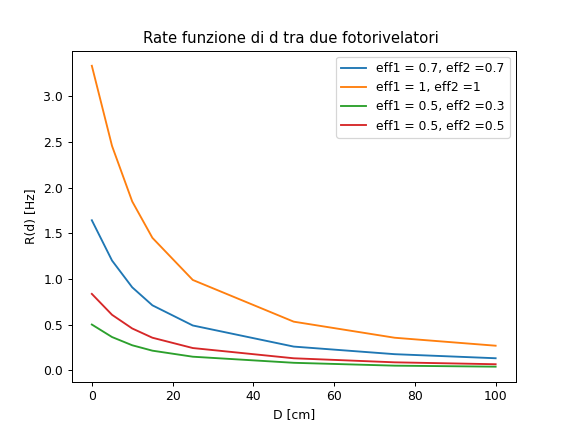

In [58]:
plt.figure(1)
plt.xlabel('D [cm]') 
plt.ylabel('R(d) [Hz]')
plt.title("Rate funzione di d tra due fotorivelatori ")
plt.plot(D, Rated1 , label= 'eff1 = 0.7, eff2 =0.7')
plt.plot(D, Rated2 , label= 'eff1 = 1, eff2 =1')
plt.plot(D, Rated3 , label= 'eff1 = 0.5, eff2 =0.3')
plt.plot(D, Rated4 , label= 'eff1 = 0.5, eff2 =0.5')
plt.legend()
plt.show()

Vogliamo considerare gli effetti sul rate di un possibile disallineamento di un cm tra i due rivelatori in entrambe le direzioni x e y

In [59]:
disx=1
disy=1
Rated2dis = np.array([rate(dd, 1, 1, disx, disy) for dd in D])
Rated4dis = np.array([rate(dd, 0.5, 0.5, disx, disy) for dd in D])

Generiamo un grafico con delle bande di incertenza che includano gli effetti del possibile disallineamento per due delle curve precedenti

<IPython.core.display.Javascript object>


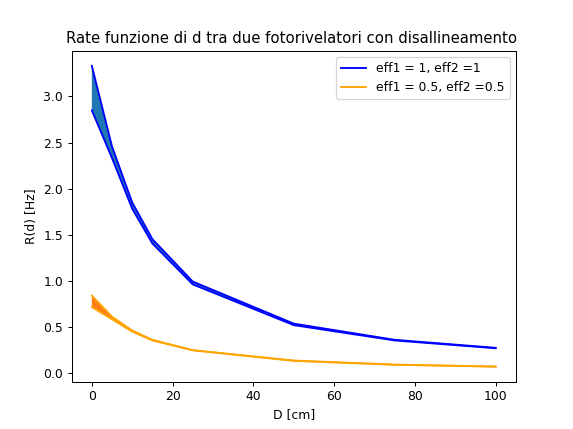

In [60]:
plt.figure(2)
plt.xlabel('D [cm]') 
plt.ylabel('R(d) [Hz]')
plt.title("Rate funzione di d tra due fotorivelatori con disallineamento ")

plt.plot(D, Rated2 , label= 'eff1 = 1, eff2 =1', color='blue')
plt.plot(D, Rated2dis, color='blue')
plt.plot(D, Rated4 , label= 'eff1 = 0.5, eff2 =0.5', color='orange')
plt.plot(D, Rated4dis, color='orange')
plt.fill_between(D,Rated2, Rated2dis)
plt.fill_between(D,Rated4, Rated4dis)
plt.legend()
plt.show()

Studiamo un ulteriore caso particolare, l'efficienza dei due rivelatori è la stessa, e fissato d, vediamo come varia R al variare dell'efficienza:

In [61]:
E= np.array([0, 0.05, 0.10, 0.15, 0.25, 0.50, 0.75, 1])

Ratef1 = np.array([rate(20, Ev, Ev) for Ev in E])
Ratef2 = np.array([rate(50, Ev, Ev) for Ev in E])
Ratef3 = np.array([rate(0, Ev, Ev) for Ev in E])

<IPython.core.display.Javascript object>


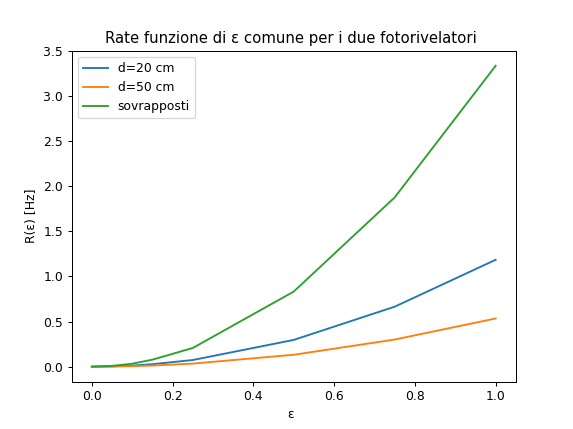

In [62]:
plt.figure(3)
plt.xlabel('ε ') 
plt.ylabel('R(ε) [Hz]')
plt.title("Rate funzione di ε comune per i due fotorivelatori ")
plt.plot(E, Ratef1 , label= 'd=20 cm')
plt.plot(E, Ratef2 , label= 'd=50 cm')
plt.plot(E, Ratef3 , label= 'sovrapposti')
plt.legend()
plt.show()

## Micromegas chambers

Si vuole ora considerare il caso in cui ci sia anche una camera micromegas posta tra i due scintillatori

In [63]:
#definiamo le dimensioni della camera
Xmm=10
Ymm=10

#definiamo una nuova funzione rate che consideri anche la presenza della camera
#chiamiamo con z la distanza dal rivelatore superiore, con posx e posy le distanze della camera 
#rispetto lo spigolo del rivelatore superiore (come valore di default è considerato il caso della camera centrata)

def ratemm(d, z, e1, e2, posx=(X-Xmm)/2, posy=(Y-Ymm)/2, disx=0,  disy=0):
    
    #definiamo una funzione che calcoli le coordinate di impatto ad una distanza d dal rivelatore superiore
    
    def imp2(arr,d):
        x2=arr[0]+d*np.cos(arr[2])*np.tan(arr[3])
        y2=arr[1]+d*np.sin(arr[2])*np.tan(arr[3])
        return [x2,y2]
    

    #costruiamo una matrice con le coordinate d'impatto sul secondo rivelatore

    inc2=np.array([imp2(inc1[i,:],d) for i in range(Nmuon)])
    
    #costruiamo una matrice con le coordinate d'impatto sulla camera
    
    inc3=np.array([imp2(inc1[i,:],z) for i in range(Nmuon)])
    
    #costruiamo due array con le probabilità di passaggio per ciascun rivelatore

    pass1 = rnd.rand(Nmuon)
    pass2 = rnd.rand(Nmuon)

    #costruiamo una matrice che verifichi che tutte le 4 condizioni per la rivelazione siano soddisfatte
    
    count=np.array([pass1[i]<e1 and pass2[i]<e2 and (0+disx)<inc2[i,0]<(X+disx) and (0+disy)<inc2[i,1]<(Y+disy)
                    and posx<inc3[i,0]<(posx+Xmm) and posy<inc3[i,1]<(posy+Ymm) for i in range(Nmuon)])

    seen=count.sum()
    frac=seen/Nmuon
    exprate=X*Y/60
    rate=exprate*frac
    return rate

In [65]:
z=10
testratem=ratemm(d,z,e1,e2)

print("\n\nI muoni rivelati sono: ", testratem*60/(X*Y)*Nmuon, "\nLa frazione rivelata è: ", testratem*60/(X*Y) )
print("Considerando un rate atteso di 1 muone per cm² al minuto il rate rivelato atteso è: "+"{0:.2f}".format(testratem)+ " Hz")




I muoni rivelati sono:  10551.0 
La frazione rivelata è:  0.10551
Considerando un rate atteso di 1 muone per cm² al minuto il rate rivelato atteso è: 0.35 Hz


Nel caso in esame la camera ha una superficie che è la metà dei due scintillatori, conseguentemente il rate stimato è circa la metà del primo calcolato

Grafichiamo l'andamento del rate per due scintillatori a venti cm di distanza e posizione della camera variabile 

In [66]:
h=20

Z= np.array([0, 3, 6, 9, 10, 11, 14, 17 ,20]) 
Rated1mm = np.array([ratemm(h, dis, e1, e2) for dis in Z]) #posizione centrata
Rated2mm = np.array([ratemm(h, dis, e1, e2, 0, 0) for dis in Z]) #camera allineata ad uno spigolo dello scintillatore


<IPython.core.display.Javascript object>


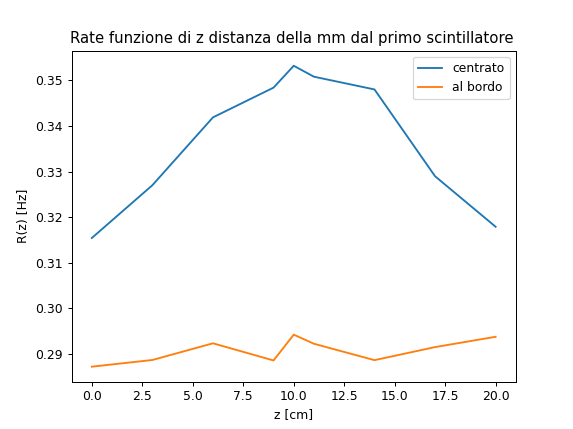

In [67]:
plt.figure(4)
plt.xlabel('z [cm]') 
plt.ylabel('R(z) [Hz]')
plt.title("Rate funzione di z distanza della mm dal primo scintillatore ")
plt.plot(Z, Rated1mm , label= 'centrato')
plt.plot(Z, Rated2mm , label= 'al bordo')
plt.legend()
plt.show()